# Project: Wrangling and Analyze Data

## Data Gathering

1. Directly downloading the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import requests
import os
import tweepy

from datetime import datetime

%matplotlib inline

In [2]:
ratings = pd.read_csv('twitter-archive-enhanced.csv')
ratings

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


2. Using the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# Making a directory 
folder_name = 'image_prediction_tsv'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [5]:
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [6]:
os.listdir(folder_name)

['.ipynb_checkpoints', 'image-predictions.tsv']

In [7]:
prediction = pd.read_csv('image_prediction_tsv/image-predictions.tsv', sep='\t')
prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


3. Using the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [8]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


In [ ]:
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Tweet IDs for which to gather additional data via Twitter's API
# Twitter API code was sent to this student from a Udacity instructor
tweet_ids = ratings.tweet_id.values
len(tweet_ids)
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [17]:
#Printing 
print("The list of tweets" ,count-len(fails_dict))
print("The list of tweets no found" , (len(fails_dict)))

The list of tweets 2327
The list of tweets no found 29


In [18]:

# Insert the JSON file into a dataframe called twitter_data by each line

# We first need to insert each line in the JSON file into a list. Each item on the list is from 1 tweet
tweets_data = []
with open('tweet_json.txt') as file:
    for line in file:
        try:
            tweet = json.loads(line) # load tweet
            tweets_data.append(tweet) # Append to list
        except:
            continue
            
#Convert tweets_data list into twitter_data            
twitter_data = pd.DataFrame(tweets_data, columns=list(tweets_data[0].keys()))

twitter_data

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,6969,33696,False,False,False,False,en
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,5272,29222,False,False,False,False,en
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,3464,21978,False,False,False,False,en
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,7191,36787,False,False,False,False,en
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,7715,35180,False,False,False,False,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2322,Mon Nov 16 00:24:50 +0000 2015,666049248165822465,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,36,88,False,False,False,False,en
2323,Mon Nov 16 00:04:52 +0000 2015,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,115,246,False,False,False,False,en
2324,Sun Nov 15 23:21:54 +0000 2015,666033412701032449,666033412701032449,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,36,100,False,False,False,False,en
2325,Sun Nov 15 23:05:30 +0000 2015,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,39,112,False,False,False,False,en


In [20]:
#seeing all the columns in the dataframe
twitter_data.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang'],
      dtype='object')

In [21]:
#because I need only tweet ID, retweet and favorite I will drop other columns
for i in ['created_at', 'id', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 
          'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str',
          'in_reply_to_user_id', 'in_reply_to_user_id_str','in_reply_to_screen_name', 
          'user', 'geo', 'coordinates', 'place','contributors', 'is_quote_status', 'favorited', 
          'possibly_sensitive','possibly_sensitive_appealable', 'lang']:
    twitter_data.drop(i, inplace=True, axis=1)
#twitter_data.columns

## Assessing Data

In [22]:
ratings.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1892,674754018082705410,6.747522e+17,4.196984e+09,2015-12-10 00:54:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Just received another perfect photo of dogs an...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674754018...,12,10,None,None,None,None,None
1945,673707060090052608,NaN,NaN,2015-12-07 03:34:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Raymond. He's absolutely terrified of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673707060...,10,10,Raymond,None,None,pupper,None
2026,671879137494245376,NaN,NaN,2015-12-02 02:30:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Brad. He's a chubby lil pup. Doesn't r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671879137...,5,10,Brad,None,None,None,None
1168,721001180231503872,NaN,NaN,2016-04-15 15:44:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oliver. Bath time is upon him. His fea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/721001180...,11,10,Oliver,None,None,pupper,None
432,820749716845686786,NaN,NaN,2017-01-15 21:49:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sunny. He can take down a polar bear in o...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820749716...,13,10,Sunny,None,None,None,None


Fom visual assessment : 
timestamp format : 2 variables in 1 column (date + time + +0000)

Null values in doggo, floofer, pupper, puppo + tidiness issue


In [23]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

From programmatic assessment:

data type of tweet_id is integer instead of string

data type of timestamp,retweeted_status_timestamp in string instead of date

data type of in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id is float instead of string

data type of doggo, floofer, pupper, puppo can be categorical

Null values in expanded_urls


In [24]:
#let's further investigate the missing values in expanded urls
missing_expanded_url = ratings.query("expanded_urls.isnull()")
missing_expanded_url

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [25]:
#checking if the url exist in the text to replace null values with url
for i in missing_expanded_url.text:
    print(i)

@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution
@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s
@RealKentMurphy 14/10 confirmed
@ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs
@Jack_Septic_Eye I'd need a few more pics to polish a full analysis, but based on the good boy content above I'm leaning towards 12/10
@Marc_IRL pixelated af 12/10
RT @Jenna_Marbles: @dog_rates Thanks for rating my cermets 14/10 wow I'm so proud I watered them so much
@xianmcguire @Jenna_Marbles Kardashians wouldn't be famous if as a society we didn't place enormous value on what they do. The dogs are very deserving of their 14/10
@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research
@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10
@markhoppus MARK THAT DOG HAS SEEN AND EXPERIENCED MA

In [26]:
ratings.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [27]:
#checking for denominator values
different= ratings.rating_denominator.unique()
print(different)

[ 10   0  15  70   7  11 150 170  20  50  90  80  40 130 110  16 120   2]


In [28]:
#example of a wrong denominator
diff_values = ratings.query("rating_denominator == 2")
for i in diff_values.text:
    print(i)
diff_values

This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


I investigated each value seperately and I concluded that 
  denominator is wrong for
  
  - 960/00 instead of 13/10 
  - 84/70  instead of 12/10
  - 165/150 instead of 11/10
  - 204/170 instead of 12/10
  - 45/50 instead of 9/10 
  - 50/50 instead of 11/10
  - 60/50 instead of 12/10
  - 99/90 instead of 11/10
  - 80/80 instead of 10/10
  - 88/80 instead of 11/10
  - 44/40 instead of 11/10
  - 143/130 instead of 11/10
  - 121/110 instead of 11/10
  - 144/120 instead of 12/10
  - 1/2 instead of 9/10
  - 4/20 instead of 13/10
  - 7/11 instead of 10/10 because :
  (This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5)

  
  and 2 null values for :
  - 20/16 because the original tweet is : (I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible)
  
  - /15 is wrong it means account started 11/15/15

In [29]:
#checking for duplicated values
ratings.duplicated().sum()

0

In [30]:
#checking for missing values
ratings.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [31]:
#visually I saw null values (isnull() method did not detect them because they are none)
name_none = ratings.query('name == "None"')
name_none

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2342,666082916733198337,NaN,NaN,2015-11-16 02:38:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916...,6,10,None,None,None,None,None
2343,666073100786774016,NaN,NaN,2015-11-16 01:59:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666073100...,10,10,None,None,None,None,None
2344,666071193221509120,NaN,NaN,2015-11-16 01:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666071193...,9,10,None,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None


In [32]:
#checking how many missing values in name 
name_none.shape

(745, 17)

From visuall assemssment: 
    
many nan values in names of dogs but we can not correct it because there are a lot of formats

In [33]:
#checking for weird names (starting with lower case)
unique_names=ratings.name.unique()

wrong_names=[]
for i in unique_names:
    if i[0].islower():
        wrong_names.append(i)
wrong_names

['such',
 'a',
 'quite',
 'not',
 'one',
 'incredibly',
 'mad',
 'an',
 'very',
 'just',
 'my',
 'his',
 'actually',
 'getting',
 'this',
 'unacceptable',
 'all',
 'old',
 'infuriating',
 'the',
 'by',
 'officially',
 'life',
 'light',
 'space']

In [34]:
#checking if the name of the dog is "space" in the tweet
space= ratings.query('name=="space"')
for i in space['text']:
    print(i)

This is space pup. He's very confused. Tries to moonwalk at one point. Super spiffy uniform. 13/10 I love space pup https://t.co/SfPQ2KeLdq


In [35]:
#checking if the name of the dog is "such" in the tweet
such= ratings.query('name=="such"')
for i in such['text']:
    print(i)

I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba


In [36]:
#checking if the name of the dog is "a" in the tweet
a= ratings.query('name=="a"')
for i in a['text']:
    print(i)

Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af 
(IG: puffie_the_chow) https://t.co/ghXBIIeQZF
Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq
Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn
This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW
Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R
This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10 https://t.co/9e48aPrBm2
This is a very rare Great Alaskan Bush Pupper. Hard to stumble upon without spooking. 12/10 would pet passionately https://t.co/xOBKCdpzaa
People please. This i

## For prediction table

In [37]:
prediction.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1981,871515927908634625,https://pbs.twimg.com/media/DBg_HT9WAAEeIMM.jpg,2,komondor,0.974781,True,briard,0.020041,True,swab,0.003228,False
2044,886258384151887873,https://pbs.twimg.com/media/DEyfTG4UMAE4aE9.jpg,1,pug,0.943575,True,shower_cap,0.025286,False,Siamese_cat,0.002849,False
1502,784517518371221505,https://pbs.twimg.com/media/CuMqhGrXYAQwRqU.jpg,2,malamute,0.757764,True,Eskimo_dog,0.151248,True,Siberian_husky,0.084840,True
253,670727704916926465,https://pbs.twimg.com/media/CU7nSZEW4AA6r5u.jpg,1,wood_rabbit,0.368562,False,tabby,0.309675,False,Egyptian_cat,0.154914,False
993,708119489313951744,https://pbs.twimg.com/media/CdO-6x5W8AENSBJ.jpg,1,Norwich_terrier,0.264483,True,Norfolk_terrier,0.258786,True,chow,0.096899,True
417,674024893172875264,https://pbs.twimg.com/media/CVqeEKLW4AA1wXH.jpg,1,Pomeranian,0.648500,True,Pekinese,0.339835,True,Persian_cat,0.006448,False
1919,855851453814013952,https://pbs.twimg.com/media/C-CYWrvWAAU8AXH.jpg,1,flat-coated_retriever,0.321676,True,Labrador_retriever,0.115138,True,groenendael,0.096100,True
462,674805413498527744,https://pbs.twimg.com/ext_tw_video_thumb/67480...,1,English_springer,0.594467,True,cocker_spaniel,0.389994,True,Welsh_springer_spaniel,0.007096,True
452,674752233200820224,https://pbs.twimg.com/media/CV0zkzEU4AAzLc5.jpg,2,vizsla,0.665516,True,redbone,0.173366,True,basset,0.134783,True
16,666102155909144576,https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg,1,English_setter,0.298617,True,Newfoundland,0.149842,True,borzoi,0.133649,True


In [38]:
#checking if all record have images
prediction.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [39]:
#checking for data types
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


tweet_id data type is integer instead of string

In [40]:
#checking for wrong values
prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [41]:
#checking for missing values
prediction.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [42]:
#checking for duplicated
prediction.duplicated().sum()

0

In [43]:
prediction.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [44]:
prediction.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [45]:
prediction.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

From the prediction table we conclude :

       Quality issue : 
    1-tweet_id integer instead of string
    2-p1_dog , p2_dog & p3_dog columns are of type object instead of boolean
    
    2- tidiness issue : 
    we can add the columns of ( 'retweet_count', 'favorite_count'and 'retweeted' )
    to the ratings table and add the colmuns of ~dogs type~ and 'name' columns of ratings table to the prediction table and call it dog table 
    

## For twitter_data table

In [46]:
#visual assessment
twitter_data.sample(10)

,id_str,retweet_count,favorite_count,retweeted
1028,742161199639494656,1238,3986,False
1874,674638615994089473,509,1515,False
1535,688179443353796608,527,1976,False
2094,670385711116361728,173,487,False
1474,692041934689402880,1130,3113,False
1573,686003207160610816,562,1676,False
956,749317047558017024,2038,5082,False
297,835246439529840640,63,1987,False
837,762699858130116608,3293,11328,False
54,881633300179243008,8,113,False


In [47]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id_str          2327 non-null   object
 1   retweet_count   2327 non-null   int64 
 2   favorite_count  2327 non-null   int64 
 3   retweeted       2327 non-null   bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 56.9+ KB


In [48]:
twitter_data.describe()

,retweet_count,favorite_count
count,2327.000000,2327.000000
mean,2458.681994,7026.739149
std,4163.725219,10919.817794
min,1.000000,0.000000
25%,492.500000,1220.500000
50%,1144.000000,3037.000000
75%,2844.500000,8564.000000
max,70331.000000,144247.000000


In [49]:
#collecting the missing tweet id hoping we can collect them
list_rating=[]
list_prediction=[]
list_missing=[]
for i in ratings['tweet_id']:
    list_rating.append(i)
for j in prediction['tweet_id']:
    list_prediction.append(j)   
for i in list_rating:
    if (not( i in list_prediction)):
        list_missing.append(i)
len(list_missing)

281

In [50]:
#comparing the name of tweet_id in 3 tables
prediction.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [51]:
ratings.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [52]:
twitter_data.columns

Index(['id_str', 'retweet_count', 'favorite_count', 'retweeted'], dtype='object')

### Quality issues

1. Missing data in twitter_data table (but I can not solve this issue)
    <ol> in Ratings table : 2356 </ol>
    <ol> in prediction table : 2075   </ol>
    <ol> in twitter_data table  : 2327   </ol>
 
    **In ``ratings`` table**
     missing data :
    in name column
    in doggo,floofer,pupper,puppo columns 
2.  p1_dog , p2_dog & p3_dog columns are of type object instead of boolean

3. wrong dog names 

4. wrong denominators

5. wrong data types in :
    
    retweeted_status_id,	retweeted_status_user_id, in_reply_to_status_id,	in_reply_to_user_id :	are floats
    
    timestamp,retweeted_status_timestamp  : are objects (string)

6. Some tweets are not original they are retweets (duplicated data)

7. in ``ratings`` & ``prediction`` tables:
        tweet_id is integer 

8. In the ``twitter_data`` table the name of the 'id_str' column should be replaced to 'tweet_id' like in other tables

### Tidiness issues
1. doggo floffer pupper poppo columns should be all in one column called race_dog


2. In time stamps we have 2 variable date and time : should be seperated 


3. Add (race_dog, name) columns from ratings table to pediction table which will be dog table

4. Add ( 'retweet_count', 'favorite_count'and 'retweeted' ) columns from clean_twitter_data table to ratings table  which will be twitter_data_dog table

## Cleaning Data

In [53]:
# Make copies of original pieces of data
clean_ratings = ratings.copy()
clean_prediction = prediction.copy()
clean_twitter_data = twitter_data.copy()

### Issue #1: Delete retweeted data

#### Define:

Delete tweets that are retweeted and I can delete the corresponding columns :

'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'

#### Code

In [54]:
#I am going to leave the record that have null values only in the retweeted_status_id column
clean_ratings = clean_ratings[clean_ratings.retweeted_status_id.isna()]

#### Test

In [55]:
clean_ratings.retweeted_status_id.unique()

array([nan])

In [56]:
#I can now delete corresponding columns to retweet because they all have nan values
clean_ratings.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1,inplace=True)

In [57]:
clean_ratings.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Issue #1: missing data (names url) we can not find it that easily names to extract takes a lot of time

#### Define:

#### Code

#### Test

### Issue #2:tidiness

#### Define

concatenate the values in doggo, floffer, pupper, and poppo columns to race_dog column


#### Code

In [58]:
clean_ratings.doggo.value_counts()

None     2088
doggo      87
Name: doggo, dtype: int64

In [59]:
clean_ratings.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [60]:
race_dog = clean_ratings['doggo']+clean_ratings['floofer']+clean_ratings['pupper']+clean_ratings['puppo']

In [61]:
race_dog.value_counts()

NoneNoneNoneNone        1831
NoneNonepupperNone       224
doggoNoneNoneNone         75
NoneNoneNonepuppo         24
doggoNonepupperNone       10
NoneflooferNoneNone        9
doggoNoneNonepuppo         1
doggoflooferNoneNone       1
dtype: int64

In [62]:
race_dog.replace('NoneNoneNoneNone',None, inplace=True)

In [63]:
race_dog.replace('NoneNonepupperNone',"pupper", inplace=True)

In [64]:
race_dog.replace('doggoNoneNoneNone',"doggo", inplace=True)

In [65]:
race_dog.replace('NoneNoneNonepuppo',"puppo", inplace=True)

In [66]:
race_dog.replace('NoneflooferNoneNone',"floofer", inplace=True)

In [67]:
#if the dog is doggo and pupper that means he is a puppo from the definition
race_dog.replace('doggoNonepupperNone',"puppo", inplace=True)

In [68]:
#this is a typo because a dog can not be mature "doggo" and teenager "puppo" at the same time
race_dog.replace('doggoNoneNonepuppo',"puppo", inplace=True)

In [69]:
race_dog.replace('doggoflooferNoneNone',"doggo & floofer", inplace=True)

In [70]:
#let's add the column
clean_ratings['race_dog'] = race_dog

In [71]:
#we can drop other columns
clean_ratings.drop(['doggo','floofer','pupper','puppo'], axis=1,inplace=True)

#### Test

In [72]:
clean_ratings.race_dog.value_counts()

pupper             224
doggo               75
puppo               35
floofer              9
doggo & floofer      1
Name: race_dog, dtype: int64

In [73]:
clean_ratings.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'race_dog'],
      dtype='object')

#### Define

extract date and time from ``timestamp`` and ``retweeted_status_timestamp`` columns and put them in sperated columns 

#### Code

In [74]:
extracting = clean_ratings.timestamp.str.extract(r'(\d{4}-\d{2}-\d{2})\s(\d{2}:\d{2}:\d{2})\s(.*)')

In [75]:
clean_ratings['date']=extracting[0]
clean_ratings['time']=extracting[1]

In [76]:
#we can delete timestamp column
del clean_ratings['timestamp']

#### Test

In [77]:
clean_ratings

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,race_dog,date,time
0,892420643555336193,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,2017-08-01,16:23:56
1,892177421306343426,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,2017-08-01,00:17:27
2,891815181378084864,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,2017-07-31,00:18:03
3,891689557279858688,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,2017-07-30,15:58:51
4,891327558926688256,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,2017-07-29,16:00:24
...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,2015-11-16,00:24:50
2352,666044226329800704,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,2015-11-16,00:04:52
2353,666033412701032449,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,2015-11-15,23:21:54
2354,666029285002620928,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,2015-11-15,23:05:30


#### Define

3. add twitter_data columns ( 'jpg_url', 'img_num') to ratings table 
   and add (race_dog and name) column from ratings table to twitter_data table which will be dog table
   
but I will merge after changing the datatypes and column name of id_str

#### Define

Change the data type of ``tweet_id`` to string  in clean_prediction table

#### Code

In [78]:
clean_prediction['tweet_id'] = clean_prediction['tweet_id'].astype(str)


#### Test

In [79]:
clean_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### Define

change in ``clean_twitter_data`` table the name from 'id_str' to 'tweet_id' 

#### Code

In [80]:
clean_twitter_data.rename(columns={'id_str':'tweet_id'},inplace=True)

#### Test

In [81]:
clean_twitter_data

,tweet_id,retweet_count,favorite_count,retweeted
0,892420643555336193,6969,33696,False
1,892177421306343426,5272,29222,False
2,891815181378084864,3464,21978,False
3,891689557279858688,7191,36787,False
4,891327558926688256,7715,35180,False
...,...,...,...,...
2322,666049248165822465,36,88,False
2323,666044226329800704,115,246,False
2324,666033412701032449,36,100,False
2325,666029285002620928,39,112,False


#### Define

Change the data type of ``tweetid``	to string

#### Code

In [82]:
clean_ratings['tweet_id'] = clean_ratings['tweet_id'].astype(str)

#### Test

In [83]:
clean_ratings.tweet_id.dtypes

dtype('O')

#### Define

merge clean_twitter_data table to clean_ratings table which will be twitter_data_dog table and remove irrelevent columns

merge clean_ratings table to clean_prediction table which will be dog_table and remove irrelevent columns


#### Code

In [84]:
#merging clean_prediction and clean_ratings tables
dog_table = pd.merge(clean_ratings, clean_prediction, on='tweet_id', how='outer')

In [85]:
#droping columns that are not related to the dogs
dog_table.drop(['in_reply_to_status_id','in_reply_to_user_id',
                'source','text','expanded_urls', 'date', 'time'], axis=1,inplace=True)

In [86]:
#merging clean_twitter_data and clean_ratings tables
twitter_data_dog = pd.merge(clean_ratings, clean_twitter_data, on='tweet_id', how='outer')

In [87]:
#droping columns that are not related to twitter
twitter_data_dog.drop(['rating_numerator', 'rating_denominator', 'name', 'race_dog'], axis=1,inplace=True)

#### Test

In [88]:
twitter_data_dog.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'source',
       'text', 'expanded_urls', 'date', 'time', 'retweet_count',
       'favorite_count', 'retweeted'],
      dtype='object')

In [89]:
dog_table.columns

Index(['tweet_id', 'rating_numerator', 'rating_denominator', 'name',
       'race_dog', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

### Issue :delete tweets not having an image

#### Define

delete tweets not having an image

#### Code

In [90]:
#deleting tweets not having an image 
dog_table = dog_table[dog_table.jpg_url.notna()]

#### Test

In [91]:
dog_table.jpg_url.isnull().sum()

0

### Issue #2:quality

#### Define

Change the data type of ``date`` to date 

Change the data type of ``tweetid, in_reply_to_status_id,	in_reply_to_user_id``	to string

Change the data type of ``race_dog`` to categorical 


#### Code

In [92]:
twitter_data_dog['date']= pd.to_datetime(twitter_data_dog['date'])

In [93]:
#replace None of type string with nan of type float
twitter_data_dog=twitter_data_dog.replace('None',np.nan)

In [94]:
twitter_data_dog['in_reply_to_status_id'] = twitter_data_dog['in_reply_to_status_id'].astype(str)
twitter_data_dog['in_reply_to_user_id'] =twitter_data_dog['in_reply_to_user_id'].astype(str)
dog_table['race_dog'] = dog_table['race_dog'].astype('category')

#### Test

In [95]:
clean_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   object 
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   source                 2175 non-null   object 
 4   text                   2175 non-null   object 
 5   expanded_urls          2117 non-null   object 
 6   rating_numerator       2175 non-null   int64  
 7   rating_denominator     2175 non-null   int64  
 8   name                   2175 non-null   object 
 9   race_dog               344 non-null    object 
 10  date                   2175 non-null   object 
 11  time                   2175 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 220.9+ KB


In [96]:
dog_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2255
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            2075 non-null   object  
 1   rating_numerator    1994 non-null   float64 
 2   rating_denominator  1994 non-null   float64 
 3   name                1994 non-null   object  
 4   race_dog            306 non-null    category
 5   jpg_url             2075 non-null   object  
 6   img_num             2075 non-null   float64 
 7   p1                  2075 non-null   object  
 8   p1_conf             2075 non-null   float64 
 9   p1_dog              2075 non-null   object  
 10  p2                  2075 non-null   object  
 11  p2_conf             2075 non-null   float64 
 12  p2_dog              2075 non-null   object  
 13  p3                  2075 non-null   object  
 14  p3_conf             2075 non-null   float64 
 15  p3_dog              2075 non-null   ob

#### Define

Replace wrong dog names with correct values or None

wrong names list
['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an', 'very', 'just', 'my', 'his', 'actually', 'getting', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light','space']

to replace:
 'his' instead of Quizno
 "my" instead of Zoey 

#### Code

In [97]:
dog_table['name']=dog_table.name.str.replace('his','Quizno')

In [98]:
dog_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2255
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            2075 non-null   object  
 1   rating_numerator    1994 non-null   float64 
 2   rating_denominator  1994 non-null   float64 
 3   name                1994 non-null   object  
 4   race_dog            306 non-null    category
 5   jpg_url             2075 non-null   object  
 6   img_num             2075 non-null   float64 
 7   p1                  2075 non-null   object  
 8   p1_conf             2075 non-null   float64 
 9   p1_dog              2075 non-null   object  
 10  p2                  2075 non-null   object  
 11  p2_conf             2075 non-null   float64 
 12  p2_dog              2075 non-null   object  
 13  p3                  2075 non-null   object  
 14  p3_conf             2075 non-null   float64 
 15  p3_dog              2075 non-null   ob

In [99]:
dog_table['name']=dog_table.name.str.replace('my','Zoey')


In [100]:
wrong_names

['such',
 'a',
 'quite',
 'not',
 'one',
 'incredibly',
 'mad',
 'an',
 'very',
 'just',
 'my',
 'his',
 'actually',
 'getting',
 'this',
 'unacceptable',
 'all',
 'old',
 'infuriating',
 'the',
 'by',
 'officially',
 'life',
 'light',
 'space']

In [101]:
#deleting his and my from the list of wrong names
for i in wrong_names:
    if i != 'my' or i !='his':
         dog_table.loc[dog_table.name == i, 'name'] = "None"

#### Test

In [102]:
clean_ratings.query('name=="his"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,race_dog,date,time
992,748692773788876800,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",That is Quizno. This is his beach. He does not...,https://twitter.com/dog_rates/status/748692773...,10,10,his,doggo,2016-07-01,01:40:41


In [103]:
clean_ratings.query('name=="my"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,race_dog,date,time
852,765395769549590528,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is my dog. Her name is Zoey. She knows I'...,https://twitter.com/dog_rates/status/765395769...,13,10,my,None,2016-08-16,03:52:26


In [104]:
dog_table.query('name=="a"')

,tweet_id,rating_numerator,rating_denominator,name,race_dog,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [105]:
dog_table.name.value_counts()

None          641
Charlie        11
Cooper         10
Lucy           10
Oliver         10
             ... 
Glenn           1
Shelby          1
Sephie          1
Bonaparte       1
Christoper      1
Name: name, Length: 916, dtype: int64

#### Define

4. wrong denominators

wrong denominators list is  :
  - 960/00 instead of 13/10 
  - 84/70  instead of 12/10
  - 165/150 instead of 11/10
  - 204/170 instead of 12/10
  - 45/50 instead of 9/10 
  - 50/50 instead of 11/10
  - 60/50 instead of 12/10
  - 99/90 instead of 11/10
  - 80/80 instead of 10/10
  - 88/80 instead of 11/10
  - 44/40 instead of 11/10
  - 143/130 instead of 11/10
  - 121/110 instead of 11/10
  - 144/120 instead of 12/10
  - 1/2 instead of 9/10
  - 4/20 instead of 13/10
  - 7/11 instead of 10/10 because :
  (This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5)
  
  and 2 null values for :
  - 20/16 because the original tweet is : (I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible)
  
  - /15 is wrong it means account started 11/15/15

#### Code

The issue can be solved using math division for values

84/70 ,165/150, 204/170, 45/50, 60/50, 99/90, 80/80, 88/80, 44/40, 143/130, 121/110, 144/120

instead of 

12/10,11/10, 12/10, 9/10, 12/10, 11/10, 10/10, 11/10, 11/10, 11/10, 11/10, 12/10

In [106]:
dog_table['numerator_int'] = dog_table.rating_numerator // dog_table.rating_denominator
dog_table.numerator_int

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
2251    NaN
2252    NaN
2253    NaN
2254    NaN
2255    NaN
Name: numerator_int, Length: 2075, dtype: float64

In [107]:
dog_table['rating_numerator_clean']= dog_table['numerator_int'] * 10
dog_table['rating_numerator_clean']

0       10.0
1       10.0
2       10.0
3       10.0
4       10.0
        ... 
2251     NaN
2252     NaN
2253     NaN
2254     NaN
2255     NaN
Name: rating_numerator_clean, Length: 2075, dtype: float64

<b> At this stage I did not change the denominato values to 10 becuase I will use them in the next section </b>


For  typos I will use replace method

 960/00 , 50/50 , 1/2 , 4/20, 7/11

 instead of 
 
 13/10 , 11/10 , 9/10 , 13/10 , 10/10 


In [108]:
dog_table.query('rating_denominator == 11')

,tweet_id,rating_numerator,rating_denominator,name,race_dog,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,numerator_int,rating_numerator_clean
890,740373189193256964,9.0,11.0,None,NaN,https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg,3.0,golden_retriever,0.807644,True,kuvasz,0.101286,True,Labrador_retriever,0.023785,True,0.0,0.0
1483,682962037429899265,7.0,11.0,Darrel,NaN,https://pbs.twimg.com/media/CXpeVzQW8AApKYb.jpg,1.0,dingo,0.278600,False,Chihuahua,0.155207,True,loupe,0.153598,False,0.0,0.0


In [109]:
#replace rating  960/00 with  13/10
dog_table['rating_numerator_clean']=dog_table.rating_numerator_clean.replace(np.inf,13)
dog_table['rating_denominator']=dog_table.rating_denominator.replace(0,10)


In [110]:
#replace rating  50/50 with 11/10
dog_table.loc[dog_table.rating_numerator == 50, 'rating_numerator_clean'] =11
dog_table.loc[dog_table.rating_numerator == 50, 'rating_denominator'] = 10


In [111]:
#replace rating  1/2 with 9/10
dog_table.loc[dog_table.rating_denominator == 2, 'rating_numerator_clean'] =9
dog_table['rating_denominator']=dog_table.rating_denominator.replace(2,10)


In [112]:
#replace rating  4/20 with 13/10
#we have 2 records with same denominator and numerator, I will go back to the text and determine by id which one to edit
#first I will get the id of the tweet 
id_df = dog_table.loc[dog_table.rating_denominator == 20, 'tweet_id'] 
id_df

987    722974582966214656
Name: tweet_id, dtype: object

In [113]:
id_found=0
for i in id_df:
    txt = twitter_data_dog.loc[twitter_data_dog.tweet_id == i, 'text'] 
    for j in txt:
        if "13/10" in j:
            id_found=i
id_found

'722974582966214656'

In [114]:
#replace rating  4/20 with 13/10
dog_table.loc[dog_table.tweet_id == id_found, 'rating_numerator_clean'] =13
dog_table.loc[dog_table.tweet_id == id_found, 'rating_denominator'] =10

In [115]:
#replace rating 7/11 with 10/10 

dog_table.loc[(dog_table.rating_denominator == 11)&(dog_table.rating_numerator == 7 ), 'rating_numerator_clean'] = 10
dog_table.loc[(dog_table.rating_denominator == 11)&(dog_table.rating_numerator == 7 ), 'rating_denominator'] = 10

In [116]:
#replace rating 30/7 with (24/7)/10 which is  34/10
dog_table.loc[dog_table.rating_denominator == 7, 'rating_numerator_clean'] =34


In [117]:
#delete rating_numerator and numerator_int column
del dog_table['rating_numerator']
del dog_table['numerator_int']

In [118]:
#rename 'rating_numerator_clean' column to 'rating_numerator'
dog_table.rename(columns={"rating_numerator_clean": "rating_numerator"},inplace=True)

In [119]:
#reordering columns in dataframe
dog_table = dog_table[['tweet_id', 'name', 'race_dog', 'jpg_url', 'img_num', 'rating_numerator', 'rating_denominator', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3',
       'p3_conf', 'p3_dog',]]

In [120]:
#Now I can change the denominator values to 10 because I will not use other values
dog_table.loc[dog_table['rating_denominator'].notnull(), 'rating_denominator'] = 10

#### Test

In [121]:
dog_table.rating_denominator.unique()

array([10., nan])

In [122]:
dog_table.columns

Index(['tweet_id', 'name', 'race_dog', 'jpg_url', 'img_num',
       'rating_numerator', 'rating_denominator', 'p1', 'p1_conf', 'p1_dog',
       'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

#### Define

An issue appeared afte merging

Change the data type of ``rating_numerator`` ,``rating_denominator`` & ``img_num`` from float to integer

#### Code

In [123]:
dog_table['rating_numerator'] = dog_table['rating_numerator'].fillna(0).astype(int)
dog_table['rating_denominator'] = dog_table['rating_denominator'].fillna(0).astype(int)
dog_table['img_num'] = dog_table['img_num'].fillna(0).astype(int)

#### Test

In [124]:
dog_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2255
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            2075 non-null   object  
 1   name                1994 non-null   object  
 2   race_dog            306 non-null    category
 3   jpg_url             2075 non-null   object  
 4   img_num             2075 non-null   int32   
 5   rating_numerator    2075 non-null   int32   
 6   rating_denominator  2075 non-null   int32   
 7   p1                  2075 non-null   object  
 8   p1_conf             2075 non-null   float64 
 9   p1_dog              2075 non-null   object  
 10  p2                  2075 non-null   object  
 11  p2_conf             2075 non-null   float64 
 12  p2_dog              2075 non-null   object  
 13  p3                  2075 non-null   object  
 14  p3_conf             2075 non-null   float64 
 15  p3_dog              2075 non-null   ob

#### Define

Change data type of  p1_dog , p2_dog & p3_dog columns from object to boolean

#### Code

In [125]:
# Transform string to boolean
dog_table['p1_dog'] =dog_table['p1_dog'].replace({'True': True, 'False': False})   
dog_table['p2_dog'] =dog_table['p2_dog'].replace({'True': True, 'False': False})   
dog_table['p3_dog'] =dog_table['p3_dog'].replace({'True': True, 'False': False})   

#### Test

In [126]:
dog_table.p1_dog.dtypes

dtype('bool')

In [127]:
dog_table.p2_dog.dtypes

dtype('bool')

In [128]:
dog_table.p3_dog.dtypes

dtype('bool')

## Storing Data

In [129]:
#save csv files to local machine
twitter_data_dog.to_csv('twitter_archive_master.csv')
dog_table.to_csv('dog_infos_from_twitter.csv')

## Analyzing and Visualizing Data
**three (3) insights and one (1) visualization.**

In [133]:
dog_table.rating_numerator.value_counts()

10      1573
0        493
20         2
34         1
70         1
1770       1
13         1
11         1
420        1
9          1
Name: rating_numerator, dtype: int64

In [134]:
#extracting year from the date column
twitter_data_dog['year'] = pd.DatetimeIndex(twitter_data_dog['date']).year


In [135]:
#needed step to convert float to integer
twitter_data_dog['year'] = twitter_data_dog['year'].fillna(-1)


In [136]:
#convet type of year from float to integer
twitter_data_dog['year'] = twitter_data_dog['year'].astype(int)

In [137]:
twitter_data_dog.year.value_counts()

 2016    1088
 2015     688
 2017     399
-1        160
Name: year, dtype: int64

In [138]:
total_count = dog_table.race_dog.value_counts()
total_count             

pupper             203
doggo               63
puppo               32
floofer              7
doggo & floofer      1
Name: race_dog, dtype: int64

In [139]:
#I will merge the 2 tables because I need columns from both of them
df = pd.merge(twitter_data_dog, dog_table, on="tweet_id")
df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'source',
       'text', 'expanded_urls', 'date', 'time', 'retweet_count',
       'favorite_count', 'retweeted', 'year', 'name', 'race_dog', 'jpg_url',
       'img_num', 'rating_numerator', 'rating_denominator', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [140]:
fav_count_by_dog = df.groupby('race_dog')['favorite_count'].sum()
fav_count_by_dog

race_dog
doggo              1087052.0
doggo & floofer      14799.0
floofer              78247.0
pupper             1254680.0
puppo               578843.0
Name: favorite_count, dtype: float64

In [141]:
notna = df.query("race_dog.notna()")
total_fav = notna.favorite_count.sum()
total_fav

3013621.0

In [142]:
prop_fav_dog= (fav_count_by_dog/total_fav)*100
prop_fav_dog

race_dog
doggo              36.071291
doggo & floofer     0.491070
floofer             2.596445
pupper             41.633636
puppo              19.207558
Name: favorite_count, dtype: float64

In [143]:
fav_by_year = df.groupby('year')['favorite_count'].sum()
fav_by_year

year
-1             0.0
 2015    1416741.0
 2016    6497432.0
 2017    7338584.0
Name: favorite_count, dtype: float64

In [144]:
fav_by_year_prop=(fav_by_year/ df.favorite_count.sum())*100
fav_by_year_prop

year
-1        0.000000
 2015     9.288426
 2016    42.598410
 2017    48.113164
Name: favorite_count, dtype: float64

In [145]:
tot = df.groupby('year')['retweet_count'].sum()
tot

year
-1        403987.0
 2015     569482.0
 2016    2154752.0
 2017    1709236.0
Name: retweet_count, dtype: float64

In [146]:
prop = (tot/ df.year.sum())*100
prop

year
-1       10.050610
 2015    14.167886
 2016    53.607104
 2017    42.523312
Name: retweet_count, dtype: float64

### Insights:
1. Pupper (smaller and not prepared for responsability)are the most dominant dogs and they are more prefered by users than other (higher favorite count of 1,219,452)

2. Even though "WeRateDogs" was most active at 2016 and its activity was reduced since then but it started getting popular to reach its highest favorite count of 8,562,491 at 2017


3. The highest retweet at was at 2016 with 2,660,493 (66% of total favorite count during the 3 years time) which is the year at which "WeRateDogs" was most active nor when she got the highest favorite count (even though the percentage of 2017 is colse to that of 2016 : 53%)

Consequently, it may be that the high activety of that twitter account on 2015 made the retweet rate grow the following year and that growth in retweet may have contributed the the highest favorite count 

### Visualization

General Visualization


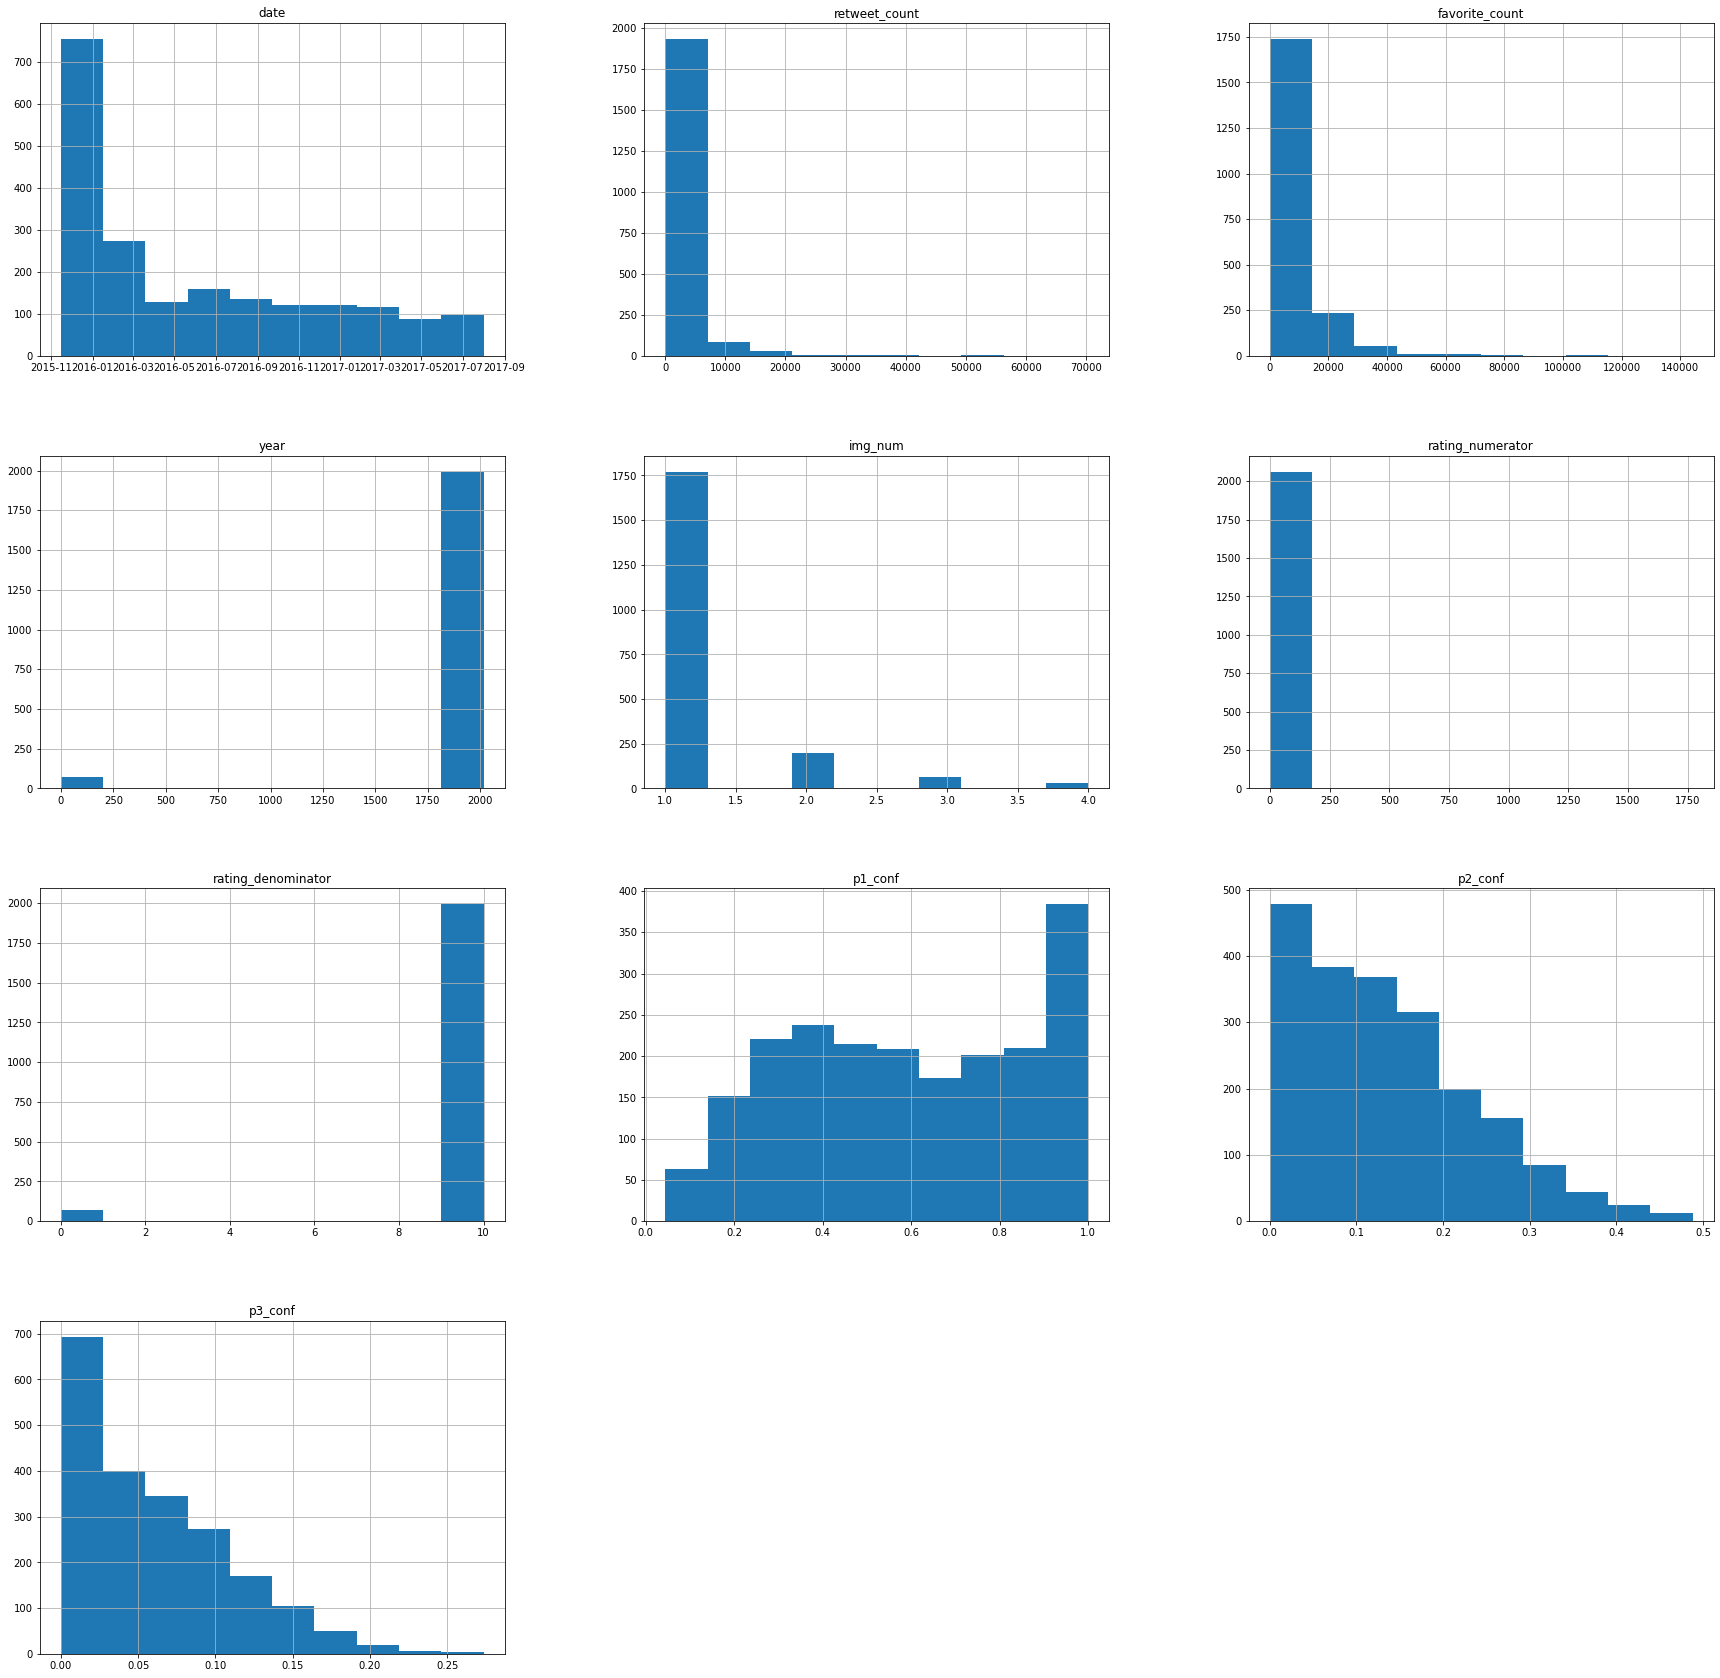

In [147]:
df.hist(figsize=(30,30), alpha=1);
print('General Visualization')

The perecentage of favorite count by dog


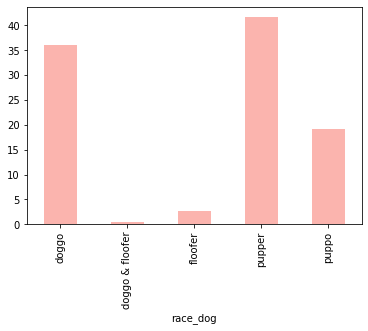

In [151]:
prop_fav_dog.plot(kind= 'bar',colormap='Pastel1');
print('The perecentage of favorite count by dog')

The perecentage of favorite count by year


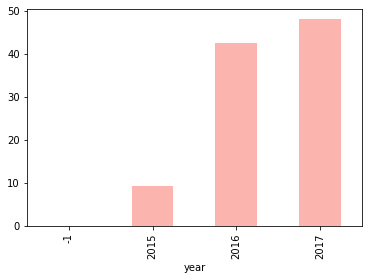

In [152]:
fav_by_year_prop.plot(kind= 'bar',colormap='Pastel1');
print('The perecentage of favorite count by year')

The perecentage of retweet count by year


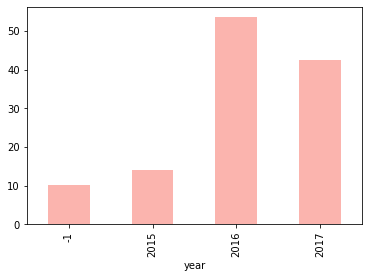

In [153]:
prop.plot(kind= 'bar',colormap='Pastel1');
print('The perecentage of retweet count by year')